# Task - 02

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

Dataset:- https://www.kaggle.com/c/titanic/data?select=train.csv


The Titanic dataset is a classic dataset used in data science and machine learning for educational purposes. It contains information about the passengers who were aboard the RMS Titanic when it sank on its maiden voyage in April 1912. The goal of analyzing this dataset is often to predict which passengers survived the disaster based on various features.

The data has been split into two groups:

**1.training set (train.csv)**

**2.test set (test.csv)**


**For data cleaning and exploratory data analysis (EDA), we typically use the train.csv file because it contains both the features and the target variable (Survived). The test.csv file is usually used for predictions.**

In [153]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#Load the dataset
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
df.shape #Total no. of rows & cols

(891, 12)

In [156]:
df.info() #summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
df.isnull().sum() #check for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Column Age, Cabin, embarked have missing values.

In [158]:
df.duplicated().sum() #check for duplicate values

0

Filling missing values in the 'Age' column with the median age.

In [159]:
df['Age'].fillna(df['Age'].median(), inplace=True)

For 'Embarked', filling missing values with the most frequent value (mode).

In [160]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


 Fill missing values in 'Cabin' with 'Unknown'

In [161]:
df['Cabin'].fillna('Unknown', inplace=True)

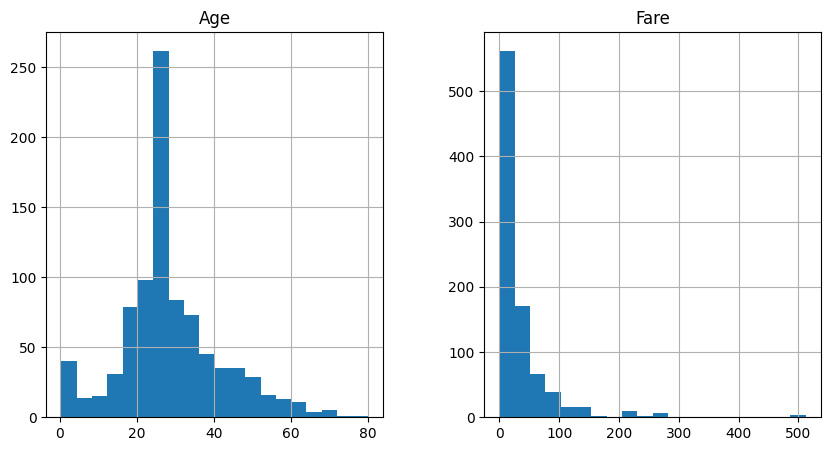

In [162]:
# Histograms for numerical features
df.hist(['Age', 'Fare'], bins=20, figsize=(10, 5))
plt.show()

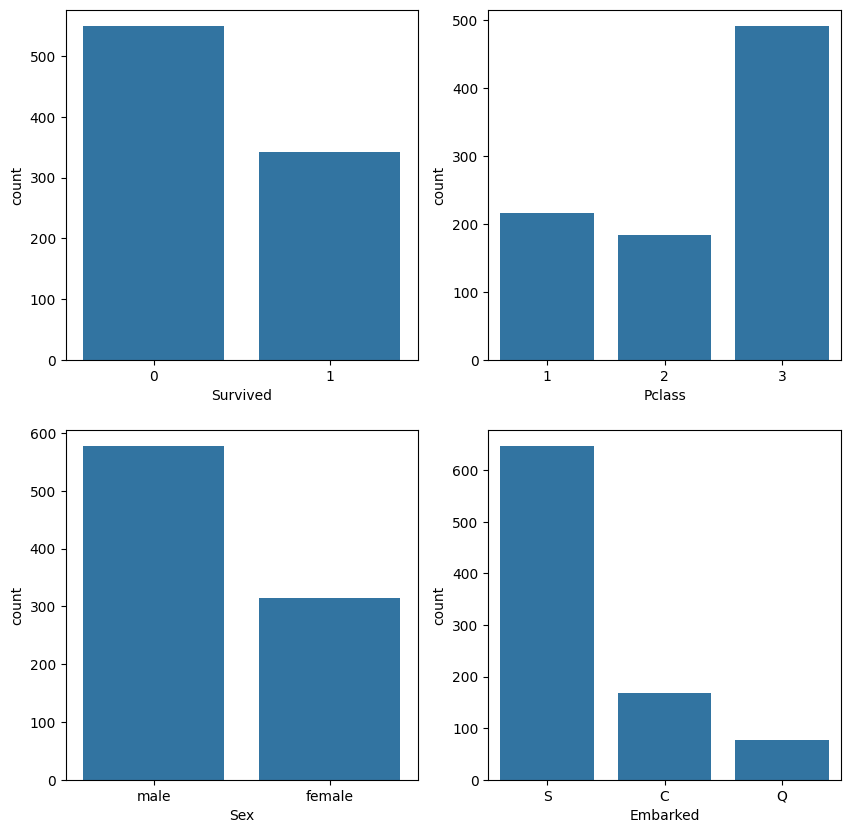

In [163]:
# Bar plots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(ax=axes[0, 0], x='Survived', data=df)
sns.countplot(ax=axes[0, 1], x='Pclass', data=df)
sns.countplot(ax=axes[1, 0], x='Sex', data=df)
sns.countplot(ax=axes[1, 1], x='Embarked', data=df)
plt.show()

<Axes: xlabel='Age'>

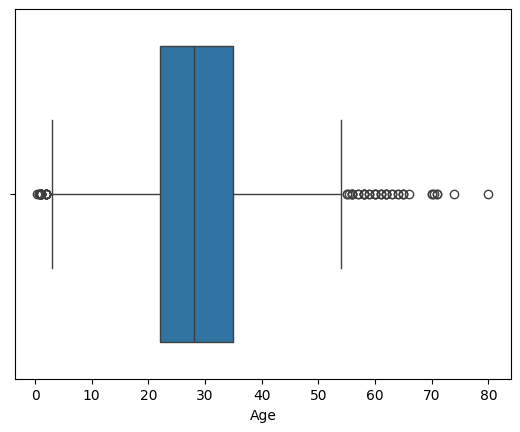

In [187]:
sns.boxplot(x=df['Age'])

In [192]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

In [193]:
q1, q3, iqr

(22.0, 35.0, 13.0)

In [194]:
upper_limit = q3 + (1.5 * iqr)   #calculating the upper and lower limit using the Interquartile Range (IQR)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(2.5, 54.5)

In [196]:
# find the outliers
df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,Unknown,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,Unknown,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Unknown,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,Unknown,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,Unknown,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,Unknown,S


In [197]:
# trimming - delete the outlier data
new_df = df.loc[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 891
after removing outliers: 825
outliers: 66


<Axes: xlabel='Age'>

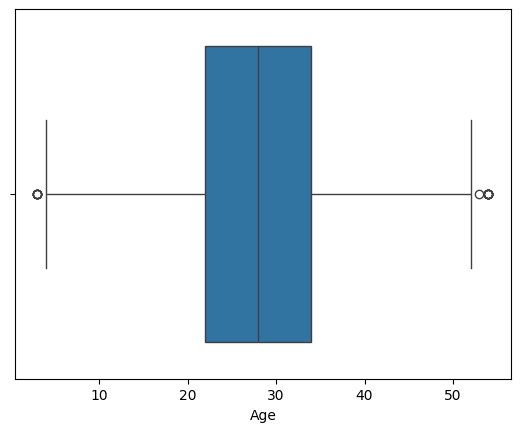

In [198]:
sns.boxplot(x=new_df['Age'])

<Axes: xlabel='Fare'>

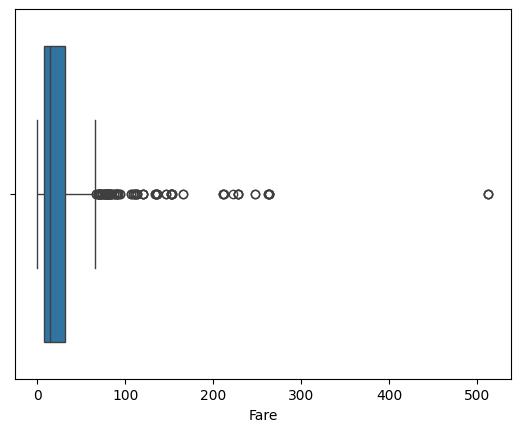

In [200]:
sns.boxplot(x=df['Fare'])

In [201]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(7.9104, 31.0, 23.0896)

In [202]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-26.724, 65.6344)

In [203]:
# find the outliers
df.loc[(df['Fare'] > upper_limit) | (df['Fare'] < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,Unknown,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,Unknown,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,Unknown,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,Unknown,S


In [204]:
# trimming - delete the outlier data
new_df = df.loc[(df['Fare'] <= upper_limit) & (df['Fare'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 891
after removing outliers: 775
outliers: 116


<Axes: xlabel='Fare'>

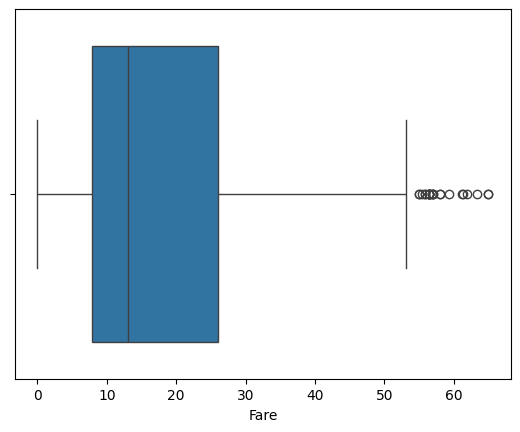

In [205]:
sns.boxplot(x=new_df['Fare'])

In [208]:
# Survival rates by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


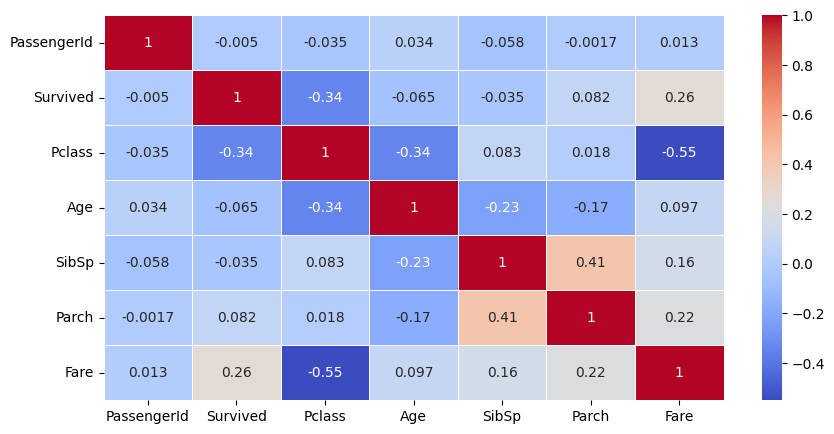

In [216]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**Pclass and Fare have a strong negative correlation (-0.55), which means that passengers in higher class generally paid more for their tickets.**

**Survived and Pclass have a moderate negative correlation (-0.34), which means that passengers in higher classes were less likely to survive.**

**Age and SibSp have a moderate negative correlation (-0.23), which means that passengers with more siblings or spouses tended to be younger.**